In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [4]:
data.shape

(96453, 12)

In [5]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [6]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [8]:
data['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [9]:
data['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                                    20085
Partly cloudy throughout the day.                                                                                     9981
Partly cloudy until night.                                                                                            6169
Partly cloudy starting in the morning.                                                                                5184
Foggy in the morning.                                                                                                 4201
                                                                                                                     ...  
Mostly cloudy starting in the morning and breezy overnight.                                                             24
Mostly cloudy starting overnight continuing until evening and breezy starting overnight continuing until morning.       24
Overcast startin

In [11]:
data.dropna(subset=['Precip Type'],inplace=True)
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95936 non-null  object 
 1   Summary                   95936 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           95936 non-null  float64
 4   Apparent Temperature (C)  95936 non-null  float64
 5   Humidity                  95936 non-null  float64
 6   Wind Speed (km/h)         95936 non-null  float64
 7   Wind Bearing (degrees)    95936 non-null  float64
 8   Visibility (km)           95936 non-null  float64
 9   Loud Cover                95936 non-null  float64
 10  Pressure (millibars)      95936 non-null  float64
 11  Daily Summary             95936 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [15]:
model=LabelEncoder()
list=['Formatted Date','Summary','Precip Type','Daily Summary']
for i in list:
    data[i]=model.fit_transform(data[i])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2159,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,2160,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,2161,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,2162,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,2163,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197


In [16]:
data.describe()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000,95936.000000
mean,47953.556454,16.013957,0.111658,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038,129.432643
std,27684.362983,4.355803,0.314947,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976,56.247661
min,0.000000,0.000000,0.000000,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,23983.750000,17.000000,0.000000,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000,95.000000
50%,47943.500000,18.000000,0.000000,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000,118.000000
75%,71927.250000,19.000000,0.000000,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000,181.000000
max,95911.000000,26.000000,1.000000,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,213.000000


In [17]:
data.corr()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,1.000000,0.057182,-0.056865,0.032863,0.033285,0.043407,-0.014183,-0.027178,0.108070,NaN,0.013153,-0.020191
Summary,0.057182,1.000000,-0.116821,0.145821,0.141956,-0.112823,0.003068,0.023057,0.135659,NaN,0.144449,0.156701
Precip Type,-0.056865,-0.116821,1.000000,-0.563503,-0.566058,0.232622,-0.067771,-0.042142,-0.316483,NaN,0.009271,-0.251911
Temperature (C),0.032863,0.145821,-0.563503,1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253,0.439386
Apparent Temperature (C),0.033285,0.141956,-0.566058,0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037,0.434318
Humidity,0.043407,-0.112823,0.232622,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375,-0.368970
Wind Speed (km/h),-0.014183,0.003068,-0.067771,0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453,-0.003597
Wind Bearing (degrees),-0.027178,0.023057,-0.042142,0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629,0.053835
Visibility (km),0.108070,0.135659,-0.316483,0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011,0.459446
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

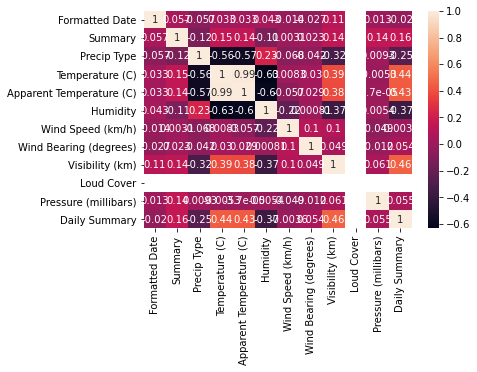

In [21]:
sns.heatmap(data.corr(),annot=True)

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precip Type', ylabel='count'>

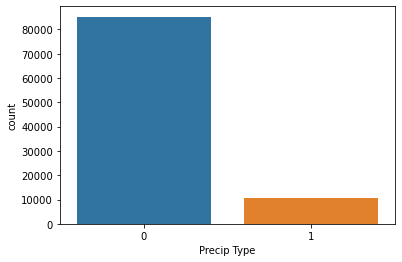

In [19]:
sns.countplot(data['Precip Type'])

c:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precip Type', ylabel='Temperature (C)'>

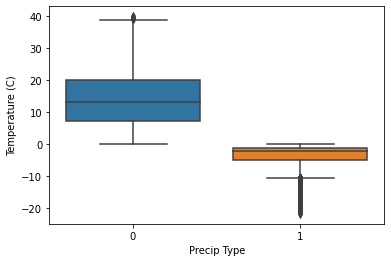

In [22]:
sns.boxplot(data['Precip Type'],data['Temperature (C)'])

In [37]:
x=data.drop('Precip Type',axis=1)
y=data['Precip Type']

In [26]:
print(x)

       Formatted Date  Summary  Temperature (C)  Apparent Temperature (C)  \
0                2159       19         9.472222                  7.388889   
1                2160       19         9.355556                  7.227778   
2                2161       17         9.377778                  9.377778   
3                2162       19         8.288889                  5.944444   
4                2163       17         8.755556                  6.977778   
...               ...      ...              ...                       ...   
96448           93568       19        26.016667                 26.016667   
96449           93569       19        24.583333                 24.583333   
96450           93570       19        22.038889                 22.038889   
96451           93571       19        21.522222                 21.522222   
96452           93572       19        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)

In [38]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: Precip Type, Length: 95936, dtype: int32


In [39]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
x.shape,x_train.shape,x_test.shape

((95936, 11), (76748, 11), (19188, 11))

In [41]:
model=LogisticRegression()

In [42]:
Std=StandardScaler()
x=Std.fit_transform(x)
print(x)

[[-1.65417551  0.68553574 -0.25795124 ...  0.          0.10215155
   1.20125367]
 [-1.65413938  0.68553574 -0.27014132 ...  0.          0.10641498
   1.20125367]
 [-1.65410326  0.22637571 -0.2678194  ...  0.          0.10905831
   1.20125367]
 ...
 [ 1.64774177  0.68553574  1.0550949  ...  0.          0.10667079
   0.72123121]
 [ 1.64777789  0.68553574  1.00111025 ...  0.          0.10914358
   0.72123121]
 [ 1.64781401  0.68553574  0.88791662 ...  0.          0.11093422
   0.72123121]]


In [43]:
model.fit(x_train,y_train)

c:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
print('Accuracy on Training Data',model.score(x_train,y_train)*100)

Accuracy on Training Data 98.87554073070308


In [45]:
print('Accuracy on Testing Data',model.score(x_test,y_test)*100)

Accuracy on Testing Data 98.91077756931416


In [46]:
y_pred=model.predict(x_test)

In [47]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [48]:
data['Precip Type'].value_counts()

0    85224
1    10712
Name: Precip Type, dtype: int64

In [49]:
from sklearn.metrics import accuracy_score,r2_score
acc=accuracy_score(y_pred,y_test)
print(acc)

0.9891077756931416


In [50]:
r2_score=r2_score(y_pred,y_test)
print(r2_score)

0.8930777296834417


In [53]:
print(y_pred.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [55]:
data=pd.DataFrame({"actual result":y_test,'predicted result':y_pred})
print(data.head(34))

       actual result  predicted result
79964              0                 0
65554              0                 0
41894              0                 0
35862              0                 0
11490              0                 0
74751              0                 0
65639              0                 0
54287              0                 0
34491              0                 0
59536              0                 0
73128              1                 1
47580              0                 0
44146              0                 0
24199              0                 0
45775              0                 1
24045              0                 0
84396              0                 0
16310              0                 0
38520              1                 1
89367              0                 0
11046              0                 0
78489              0                 0
20491              1                 1
7303               0                 0
77593              0     